In [ ]:
from google.colab import files
uploaded = files.upload()


Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [ ]:
import pandas as pd
import io

# Try different encodings, commonly used are 'latin1', 'ISO-8859-1', or 'cp1252'
df = pd.read_csv(io.BytesIO(uploaded['globalterrorismdb_0718dist.csv']), encoding='latin1')

# Alternatively, you can try other encodings like 'ISO-8859-1' or 'cp1252' if 'latin1' doesn't work.


<ipython-input-5-f969331f2340>:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['globalterrorismdb_0718dist.csv']), encoding='latin1')


In [ ]:
# Display the first few rows
print(df.head())

# Summary of the dataset
print(df.info())

# Checking for missing values
print(df.isnull().sum())


        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

In [ ]:
print(df.describe())


            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [ ]:
# List all columns in the DataFrame
print(df.columns)


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [ ]:
# Example using the correct column name
country_attacks = df['country'].value_counts().head(10)
print(country_attacks)


country
95     24636
153    14368
4      12731
92     11960
45      8306
160     6908
159     6096
61      5320
603     5235
209     4292
Name: count, dtype: int64


In [ ]:
# Number of terrorist attacks per region
region_attacks = df['region'].value_counts().head(10)
print(region_attacks)


region
10    50474
6     44974
3     18978
11    17550
8     16639
5     12485
2     10344
9      5144
1      3456
4       802
Name: count, dtype: int64


In [ ]:
# List all column names
print(df.columns)


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)


In [ ]:
# Number of terrorist attacks per country
country_attacks = df['country_txt'].value_counts().head(10)
print(country_attacks)

# Number of terrorist attacks by type
attack_type_counts = df['attacktype1_txt'].value_counts().head(10)
print(attack_type_counts)

# Number of terrorist attacks by target type
target_type_counts = df['targtype1_txt'].value_counts().head(10)
print(target_type_counts)


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64
attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64
targtype1_txt
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities            

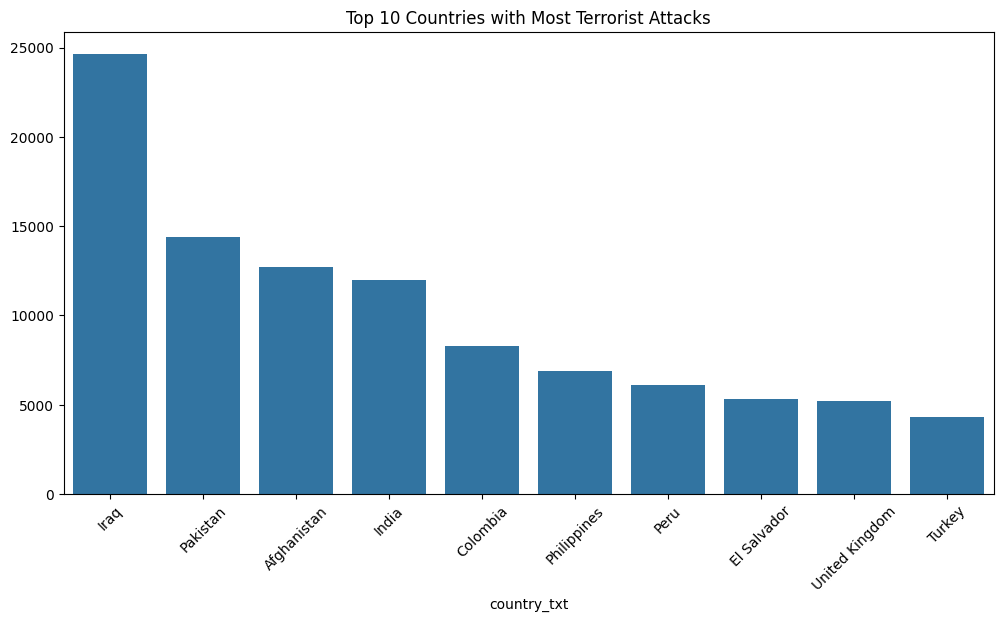

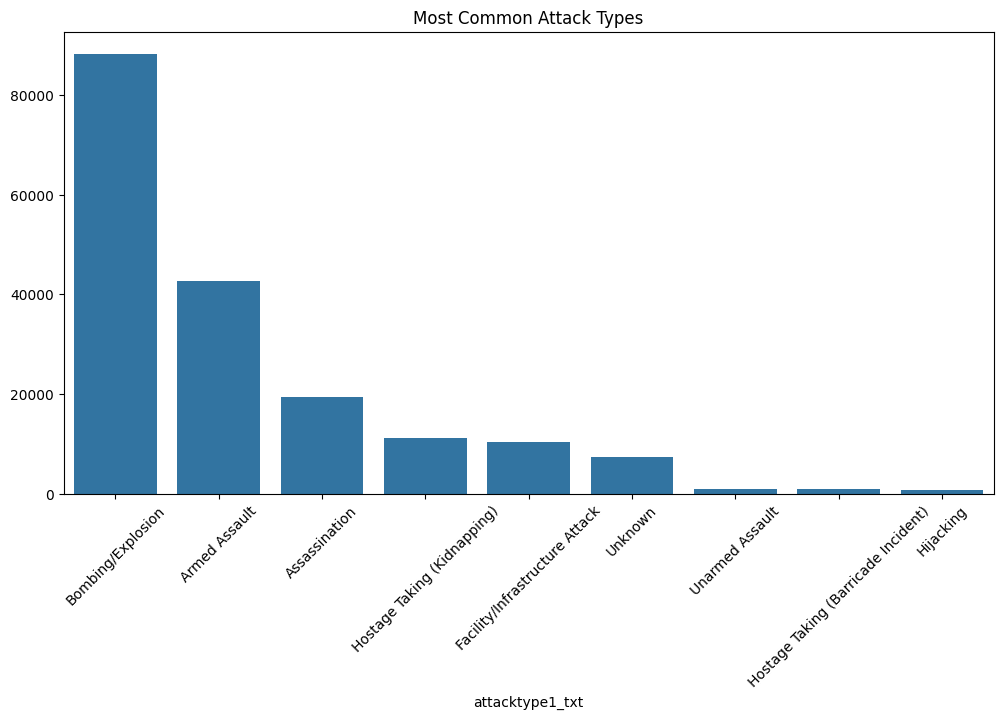

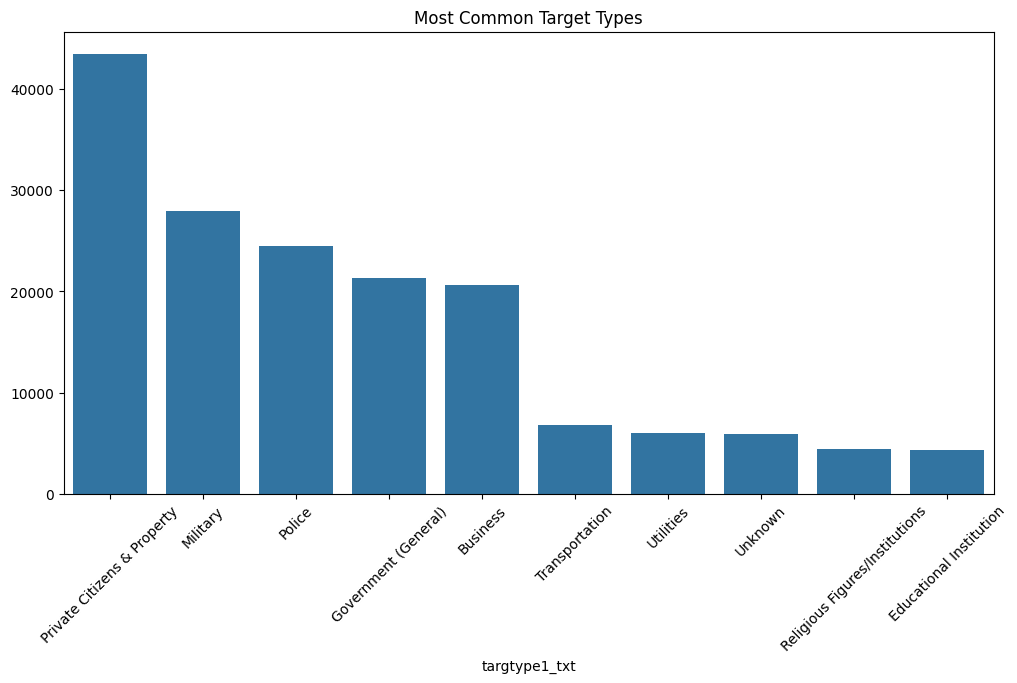

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 10 countries with the most terrorist attacks
plt.figure(figsize=(12,6))
sns.barplot(x=country_attacks.index, y=country_attacks.values)
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()

# Plotting most common attack types
plt.figure(figsize=(12,6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values)
plt.title('Most Common Attack Types')
plt.xticks(rotation=45)
plt.show()

# Plotting most common target types
plt.figure(figsize=(12,6))
sns.barplot(x=target_type_counts.index, y=target_type_counts.values)
plt.title('Most Common Target Types')
plt.xticks(rotation=45)
plt.show()


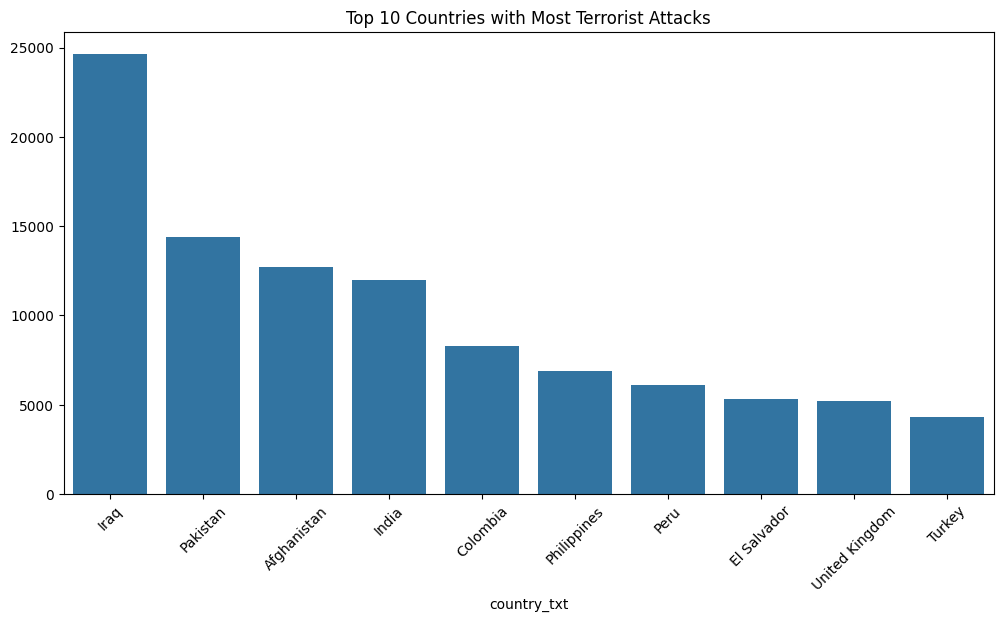

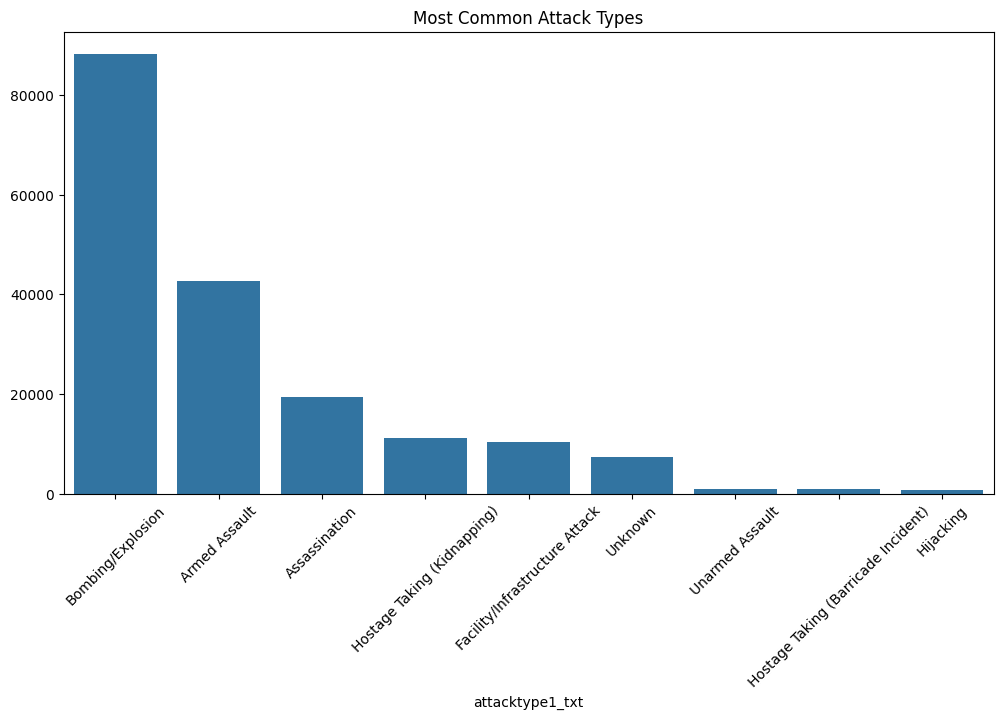

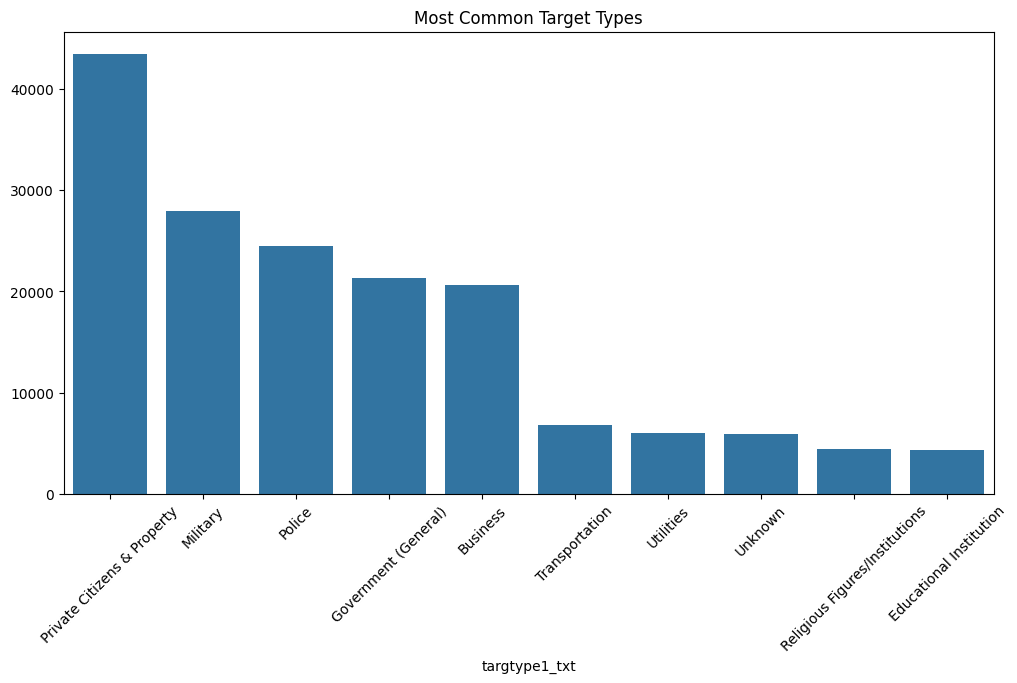

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 10 countries with the most terrorist attacks
plt.figure(figsize=(12,6))
sns.barplot(x=country_attacks.index, y=country_attacks.values)
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xticks(rotation=45)
plt.show()

# Plotting most common attack types
plt.figure(figsize=(12,6))
sns.barplot(x=attack_type_counts.index, y=attack_type_counts.values)
plt.title('Most Common Attack Types')
plt.xticks(rotation=45)
plt.show()

# Plotting most common target types
plt.figure(figsize=(12,6))
sns.barplot(x=target_type_counts.index, y=target_type_counts.values)
plt.title('Most Common Target Types')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Check if the columns exist
print(df.columns)

# Check for missing values in date-related columns
print(df[['iyear', 'imonth', 'iday']].isnull().sum())


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'total_casualties'],
      dtype='object', length=136)
iyear     0
imonth    0
iday      0
dtype: int64


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Convert date columns to datetime if necessary
df['date'] = pd.to_datetime(df[['iyear', 'imonth', 'iday']], errors='coerce')


approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64
            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.00

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [ ]:
# Top 10 countries
country_attacks = df['country_txt'].value_counts().head(10)
print(country_attacks)

# Top 10 regions
region_attacks = df['region_txt'].value_counts().head(10)
print(region_attacks)

# Top 10 cities
city_attacks = df['city'].value_counts().head(10)
print(city_attacks)


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64
region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: count, dtype: int64
city
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: count, dtype: int64


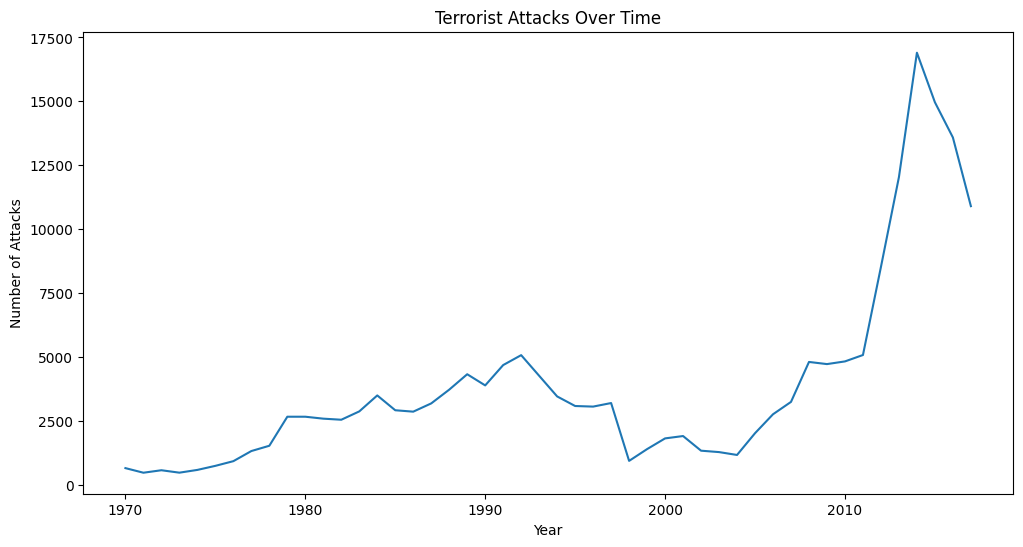

In [ ]:
# Terrorist attacks over years
yearly_attacks = df['iyear'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.plot(yearly_attacks.index, yearly_attacks.values)
plt.title('Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


In [ ]:
# Attack types
attack_type_counts = df['attacktype1_txt'].value_counts()
print(attack_type_counts)

# Weapon types
weapon_type_counts = df['weaptype1_txt'].value_counts()
print(weapon_type_counts)


attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64
weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment           

In [ ]:
# Attack types
attack_type_counts = df['attacktype1_txt'].value_counts()
print(attack_type_counts)

# Weapon types
weapon_type_counts = df['weaptype1_txt'].value_counts()
print(weapon_type_counts)


attacktype1_txt
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64
weaptype1_txt
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment           

In [ ]:
# Casualties by region
df['total_casualties'] = df['nkill'] + df['nwound']
casualties_by_region = df.groupby('region_txt')['total_casualties'].sum().sort_values(ascending=False)
print(casualties_by_region)

# Economic impact (if available in the dataset)
# df['property_damage'] = ... (you may need to calculate or extract this if available)


region_txt
Middle East & North Africa     329807.0
South Asia                     234366.0
Sub-Saharan Africa             108990.0
South America                   43562.0
Southeast Asia                  40841.0
Central America & Caribbean     34530.0
North America                   26398.0
Western Europe                  22778.0
Eastern Europe                  18239.0
East Asia                       10003.0
Central Asia                     2969.0
Australasia & Oceania             409.0
Name: total_casualties, dtype: float64


In [ ]:
# Security Insights (example)
print("Regions requiring heightened security:")
print(region_attacks.index.tolist())

print("Recommendations for protecting the most targeted entities:")
print(target_type_counts.index.tolist())


Regions requiring heightened security:
['Middle East & North Africa', 'South Asia', 'South America', 'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia', 'Central America & Caribbean', 'Eastern Europe', 'North America', 'East Asia']
Recommendations for protecting the most targeted entities:
['Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business', 'Transportation', 'Utilities', 'Unknown', 'Religious Figures/Institutions', 'Educational Institution']


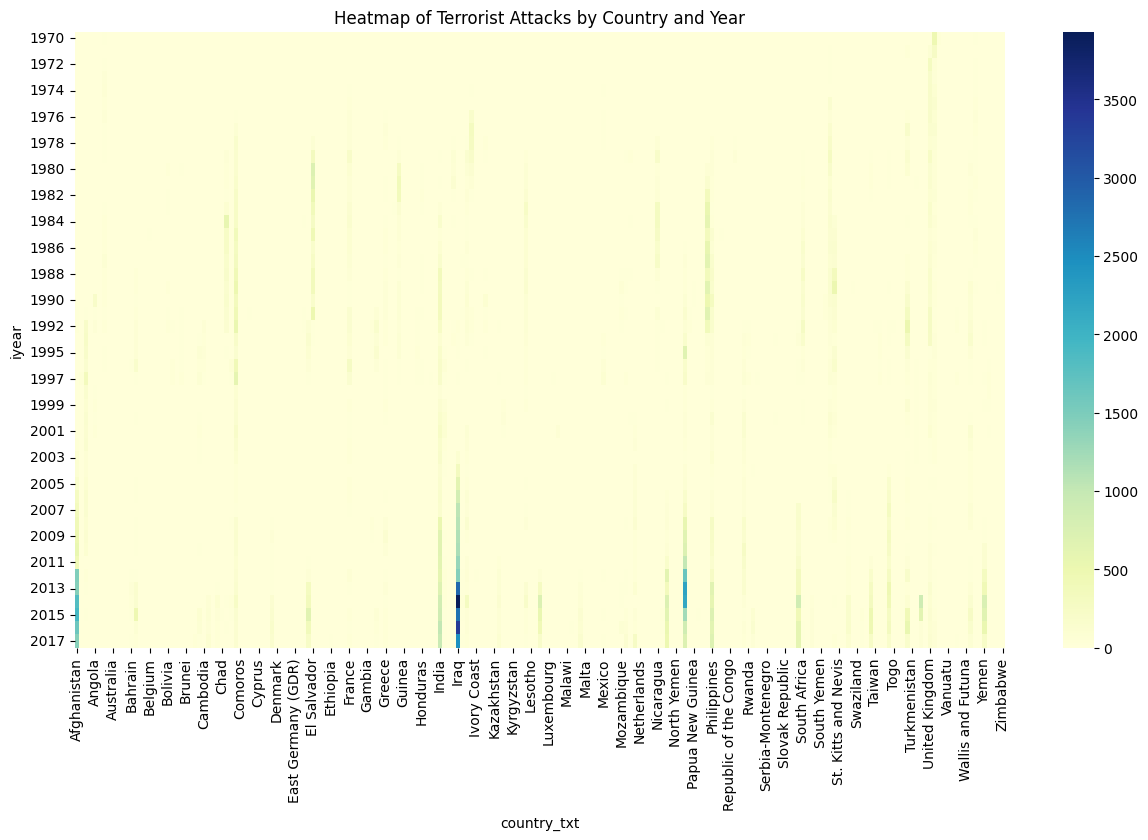

In [ ]:
import seaborn as sns

# Heatmap of attacks by country and year
plt.figure(figsize=(15,8))
attacks_heatmap = pd.crosstab(df['iyear'], df['country_txt'])
sns.heatmap(attacks_heatmap, cmap="YlGnBu")
plt.title('Heatmap of Terrorist Attacks by Country and Year')
plt.show()
